In [3]:
import torch
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16).to("cuda")

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 15.72it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 80.00 MiB. GPU 0 has a total capacity of 47.41 GiB of which 72.25 MiB is free. Including non-PyTorch memory, this process has 47.33 GiB memory in use. Of the allocated memory 46.91 GiB is allocated by PyTorch, and 108.21 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [4]:
lora_path = "/root/lowlettersfluxv3-000073.safetensors"
pipe.load_lora_weights(lora_path, adapter_name="letters")
pipe.set_adapters("letters", 1.0)

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


In [9]:

prompt = """lowletters, The image is made in a cyberpand style with a bright neon texture. It features four large letters each surrounded by a wide golden border. The inside of the letters is painted in rich colors, and the thin veins and cracks on the surface resemble the texture of wood, giving them a man-made and expressive appearance.A vertical composition of five text words arranged from top to bottom. The first word is "MAJOR", the second is "MINOR", the third is "MINI". The color of the text is different, the first is gold, the second is red, the third is purple, the fourth is blue, the fifth is turquoise. The text is written in large capital letters, clearly centered. White background.
"""
out = pipe(
    prompt=prompt,
    guidance_scale=3.5,
    height=1024,
    width=1024,
    num_inference_steps=50,
).images[0]
out.save("image.png")

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arranged from top to bottom. the first word is " major ", the second is " minor ", the third is " mini ". the color of the text is different, the first is gold, the second is red, the third is purple, the fourth is blue, the fifth is turquoise. the text is written in large capital letters, clearly centered. white background.']


100%|██████████| 50/50 [00:54<00:00,  1.10s/it]


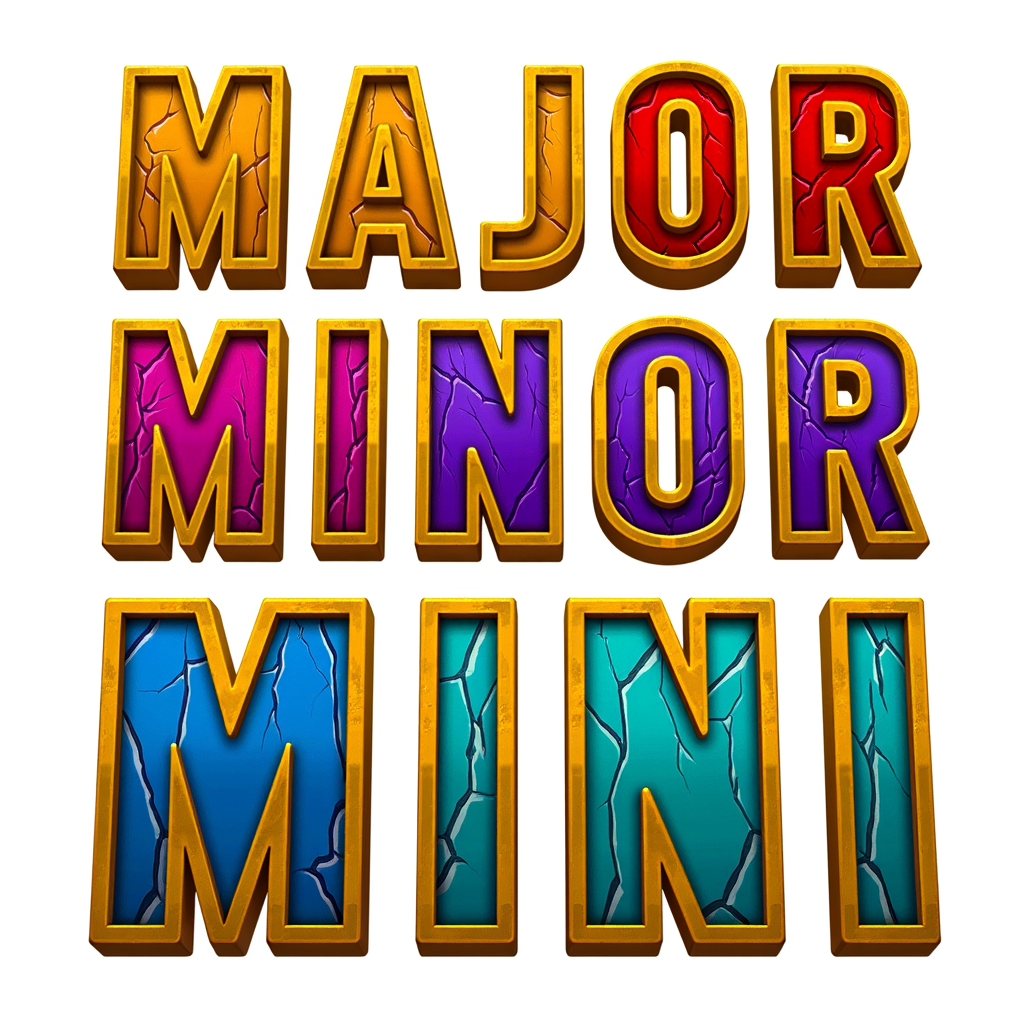

In [10]:
out